📌 Top Candidate Drugs per SARS-CoV-2 Target:

            Drug         Target Protein  Binding Energy (kcal/mol)
6      Ritonavir   Mpro (Main Protease)                     -10.65
29  Azithromycin  RdRp (RNA Polymerase)                     -10.72
10   Chloroquine      Spike Protein RBD                     -10.88


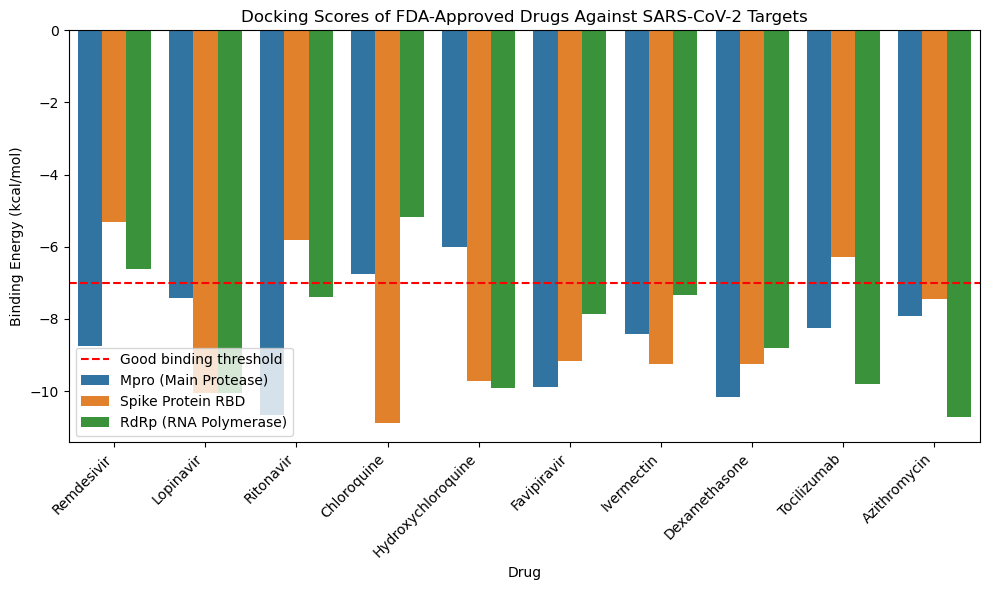


✅ Results saved to covid19_docking_results.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Step 1: Create Dummy Drug Dataset
# -------------------------------
drugs = [
    "Remdesivir", "Lopinavir", "Ritonavir", "Chloroquine", "Hydroxychloroquine",
    "Favipiravir", "Ivermectin", "Dexamethasone", "Tocilizumab", "Azithromycin"
]

targets = ["Mpro (Main Protease)", "Spike Protein RBD", "RdRp (RNA Polymerase)"]

# Generate dummy docking scores (-5 to -11 kcal/mol range is realistic)
np.random.seed(42)  # for reproducibility
data = []
for drug in drugs:
    for target in targets:
        docking_score = np.round(np.random.uniform(-11, -5), 2)
        data.append([drug, target, docking_score])

df = pd.DataFrame(data, columns=["Drug", "Target Protein", "Binding Energy (kcal/mol)"])

# -------------------------------
# Step 2: Analyze Results
# -------------------------------
# Find top-scoring drug for each target
best_hits = df.loc[df.groupby("Target Protein")["Binding Energy (kcal/mol)"].idxmin()]

print("📌 Top Candidate Drugs per SARS-CoV-2 Target:\n")
print(best_hits)

# -------------------------------
# Step 3: Visualization
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(
    data=df, 
    x="Drug", 
    y="Binding Energy (kcal/mol)", 
    hue="Target Protein"
)
plt.xticks(rotation=45, ha="right")
plt.title("Docking Scores of FDA-Approved Drugs Against SARS-CoV-2 Targets")
plt.ylabel("Binding Energy (kcal/mol)")
plt.axhline(-7.0, color="red", linestyle="--", label="Good binding threshold")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 4: Save Results
# -------------------------------
df.to_csv("covid19_docking_results.csv", index=False)
print("\n✅ Results saved to covid19_docking_results.csv")